## Compulsory treatment of alcoholism 2000-2021

### 1. topic description

In [1]:
id = 1
topicName = 'treatment-of-alcoholism-pl'
title = """
list of cases of alcohol-dependent persons subjected to 
compulsory treatment under a court order (Alk list)
""".replace('\n',' ').strip()
titlePl = """
wykaz spraw osób uzależnionych od alkoholu poddanych 
obowiązkowemu leczeniu na mocy orzeczenia sądu (wykaz Alk)
""".replace('\n',' ').strip()
country = 'Poland'
countryPl = 'Polska'
startYear = 2000
endYear = 2021
description="""
The list of cases is maintained by the Polish Ministry of Justice. 
In addition, a visualization of data on average annual
consumption of alcoholic beverages per capita 
per liter of 100% alcohol (Poland) has been included.
Data on alcohol consumption is collected and published by the Polish 
State Agency for Solving Alcohol Problems.
""".replace('\n',' ').strip()
descriptionPl="""
Wykaz spraw jest prowadzony przez polskie Ministerstwo Sprawiedliwości. 
Dodatkowo została umieszczona wizualizacja danych o średnim rocznym
spożyciu napojów alkoholowych na jednego mieszkańca 
w przeliczeniu na jeden litr alkoholu 100% (Polska).
Dane o spożyciu alkoholu są gromadzone i publikowane przez polską 
Państwową Agencję Rozwiązywania Problemów Alkoholowych.
""".replace('\n',' ').strip()
sourceName = "Ministry of Justice (PL)"
sourceNamePl ="Ministerstwo Sprawiedliwości (PL)"
sourceLink="https://isws.ms.gov.pl/pl/baza-statystyczna/opracowania-wieloletnie/"
fileName= "treatment-alcoholism-pl"
sourceFileExt = 'xlsx'


In [2]:
from src.database.insert_topic import insert_topic

insert_topic(
    id,
    topicName,
    title,
    titlePl,
    country,
    countryPl,
    startYear,
    endYear,
    description,
    descriptionPl,
    sourceName,
    sourceNamePl,
    sourceLink,
    fileName,
    sourceFileExt
)

An error occurred: (1062, 'target: legal-charts-dev.-.primary: vttablet: rpc error: code = AlreadyExists desc = Duplicate entry \'1\' for key \'topics.PRIMARY\' (errno 1062) (sqlstate 23000) (CallerID: dwxslyebsjlgo852x54a): Sql: "insert into topics(id, topicName, title, titlePl, country, countryPl, startYear, endYear, description, descriptionPl, sourceName, sourceNamePl, sourceLink, fileName, sourceFileExt) values (:vtg1 /* INT64 */, :vtg2 /* VARCHAR */, :vtg3 /* VARCHAR */, :vtg4 /* VARCHAR */, :vtg5 /* VARCHAR */, :vtg6 /* VARCHAR */')


In [3]:
from src.database.connect_db import connect_db

db = connect_db()

cursor = db.cursor()

In [4]:
import pandas as pd

original_data_path = '../data/raw/leczenie-alkoholowe-wykaz-alk-w-latach-2000-2021.xlsx'

df = pd.read_excel(original_data_path, 
                   skiprows=8,
                   skipfooter=4)

df.head()

,Unnamed: 0,Unnamed: 1,niestacjonarnym,stacjonarnym,zawodowego,społecznego,Unnamed: 6
0,2000,35111,21837,13274,4734,7250,4808
1,2001,37632,22670,14962,4837,7786,5208
2,2002,35726,20895,14831,4467,7029,5389
3,2003,38101,22022,16079,5026,7736,6156
4,2004,43756,25191,18565,5687,10805,8084


In [5]:
df.tail()

,Unnamed: 0,Unnamed: 1,niestacjonarnym,stacjonarnym,zawodowego,społecznego,Unnamed: 6
17,2017,42859,24228,18631,8039,12289,12317
18,2018,40679,22801,17878,7707,12326,11630
19,2019,39560,22124,17436,7909,11641,11292
20,2020,33177,18761,14416,6824,9227,9606
21,2021,29723,16995,12728,7005,8053,8394


Column with index 1 is deleted as it contains sum of columns with indexes 2 and 3 - data duplication

In [6]:
df.drop(df.columns[1], axis=1, inplace=True)

In [7]:
df.head()

,Unnamed: 0,niestacjonarnym,stacjonarnym,zawodowego,społecznego,Unnamed: 6
0,2000,21837,13274,4734,7250,4808
1,2001,22670,14962,4837,7786,5208
2,2002,20895,14831,4467,7029,5389
3,2003,22022,16079,5026,7736,6156
4,2004,25191,18565,5687,10805,8084


### 2. Columns names & descriptions

In [8]:
column_names_descriptions = {
    0: ('year', 
        'year', 
        'rok'),
    1: ('closeNonStationary', 
        'ongoing treatment - non-stationary', 
        'trwające leczenie - zakład niestacjonarny'),
    2: ('closeStationary', 
        'facility ongoing treatment - closed facility', 
        'trwające leczenie - zakład stacjonarny'),
    3: ('professionalGuardianship', 
        'under professional guardianship', 
        'objęci kuratelą zawodową'),
    4: ('communityGuardianship', 
        'under social guardianship', 
        'objęci kuratelą społeczną'),
    5: ('closeStationaryAwaiting', 
        'awaiting treatment in closed facility', 
        'oczekujący na umieszczenie w zakładzie stacjonarnym')
}

new_column_names = [t[0] for t in column_names_descriptions.values()]


In [9]:
df = df.set_axis(new_column_names, axis=1)

df.head()

,year,closeNonStationary,closeStationary,professionalGuardianship,communityGuardianship,closeStationaryAwaiting
0,2000,21837,13274,4734,7250,4808
1,2001,22670,14962,4837,7786,5208
2,2002,20895,14831,4467,7029,5389
3,2003,22022,16079,5026,7736,6156
4,2004,25191,18565,5687,10805,8084


### 3. create db tables

In [10]:
MAIN_TABLE_NAME = 'alcoholismTreatmentPl'

In [11]:
query = f"CREATE TABLE {MAIN_TABLE_NAME} (year INT PRIMARY KEY, "

for column in df.columns[1:]:
    query += f"{column} INT NOT NULL, "


query = query[:-2] + ")"

In [12]:
try:
    cursor.execute(query)
except:
    print('table already created')

In [13]:
df.dtypes

year                        int64
closeNonStationary          int64
closeStationary             int64
professionalGuardianship    int64
communityGuardianship       int64
closeStationaryAwaiting     int64
dtype: object

In [14]:
data = [tuple(row) for index, row in df.iterrows()]

In [15]:
query = f"""
INSERT INTO {MAIN_TABLE_NAME} ({', '.join(df.columns)}) 
VALUES ({', '.join(['%s']*len(df.columns))});
"""

try:
    cursor.executemany(query, data)
except:
    print('data added already')

In [16]:
cursor.execute(f"""
               SELECT * 
               FROM {MAIN_TABLE_NAME}
               LIMIT 5
               """)
cursor.fetchall()


((2000, 21837, 13274, 4734, 7250, 4808),
 (2001, 22670, 14962, 4837, 7786, 5208),
 (2002, 20895, 14831, 4467, 7029, 5389),
 (2003, 22022, 16079, 5026, 7736, 6156),
 (2004, 25191, 18565, 5687, 10805, 8084))

In [17]:
from src.database.create_ds_desc_table import create_ds_desc_table


create_ds_desc_table(MAIN_TABLE_NAME)

In [18]:
data = [row for row in column_names_descriptions.values()]

In [19]:
from src.database.insert_into_ds_desc import insert_into_ds_desc


insert_into_ds_desc(MAIN_TABLE_NAME, data)

### 4. upload files to GCP storage

In [20]:
df_desc = pd.DataFrame(data, 
    columns=['column_name', 
    'description', 
    'descriptionPl'])

In [21]:
df_path = f'../data/processed/{topicName}/{fileName}.csv'
df_path_desc =f'../data/processed/{topicName}/{fileName}-desc.csv'

In [22]:
df.to_csv(df_path, index=False)
df_desc.to_csv(df_path_desc, index=False)

In [23]:
destination = f"{topicName}/{fileName}.csv"
destination_desc = f"{topicName}/{fileName}-desc.csv"
destination_original = f"{topicName}/{fileName}-source.{sourceFileExt}"

In [24]:
from src.utils.upload_file_gpc import upload_file

upload_file(df_path,destination)
upload_file(df_path,destination_desc)
upload_file(original_data_path,destination_original)

File ../data/processed/treatment-of-alcoholism-pl/treatment-alcoholism-pl.csv uploaded to legal-charts-datasets/treatment-of-alcoholism-pl/treatment-alcoholism-pl.csv.
File ../data/processed/treatment-of-alcoholism-pl/treatment-alcoholism-pl.csv uploaded to legal-charts-datasets/treatment-of-alcoholism-pl/treatment-alcoholism-pl-desc.csv.
File ../data/raw/leczenie-alkoholowe-wykaz-alk-w-latach-2000-2021.xlsx uploaded to legal-charts-datasets/treatment-of-alcoholism-pl/treatment-alcoholism-pl-source.xlsx.


### 5. data intro

closeNonStationary
closeStationary
professionalGuardianship
communityGuardianship
closeStationaryAwaiting


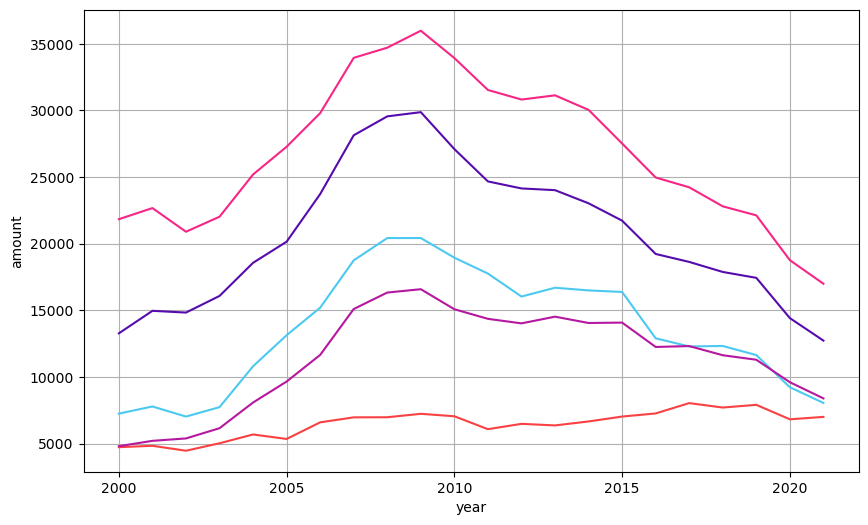

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils.sns_pallete import palette

plt.figure(figsize=(10, 6))

sns.set_palette(palette)

for y in df.columns[1:]:
    print(y)
    sns.lineplot(data=df, x='year', y=y)

plt.xlabel('year')
plt.ylabel('amount')
plt.grid(True)
plt.show()


In [26]:
db.close()